## 1.Importing the libraries

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seabor library for interactive visualization
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression                 # To scaled data with mean 0 and variance 1
from sklearn.model_selection import train_test_split                # To split the data in training and testing part
from sklearn.tree import DecisionTreeClassifier                     # To implement decision tree classifier
from sklearn.metrics import classification_report                   # To generate classification report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")

## 2. Data Acquisition & Description

In [5]:
#Lets look at our dataset
data = pd.read_csv('creditcard_2023.csv')

In [6]:
print('Shape of our Dataset -',data.shape)
data.head()

Shape of our Dataset - (568630, 31)


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [7]:
#Lets see Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [8]:
#Lets see data description
data.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


**Observations**-
- We have 568630 Rows of observations having 31 columns.
- **'Class' is our Output feature indicating whether the transaction is fraudulent (1) or not (0).**
- No missing values observed in our Dataset.
- dtype of all the features looks perfect.

In [9]:
#Data Preprocessing

In [10]:
#Lets check for missing values
data.isna().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
# Lets check for duplicates if any
data.duplicated().any()

False

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

**Observations**
- No missing values.
- No duplicates.
- dtype also looks fine.

## Exploratory Data Analysis

In [13]:
#Lets look at the Heatmap First

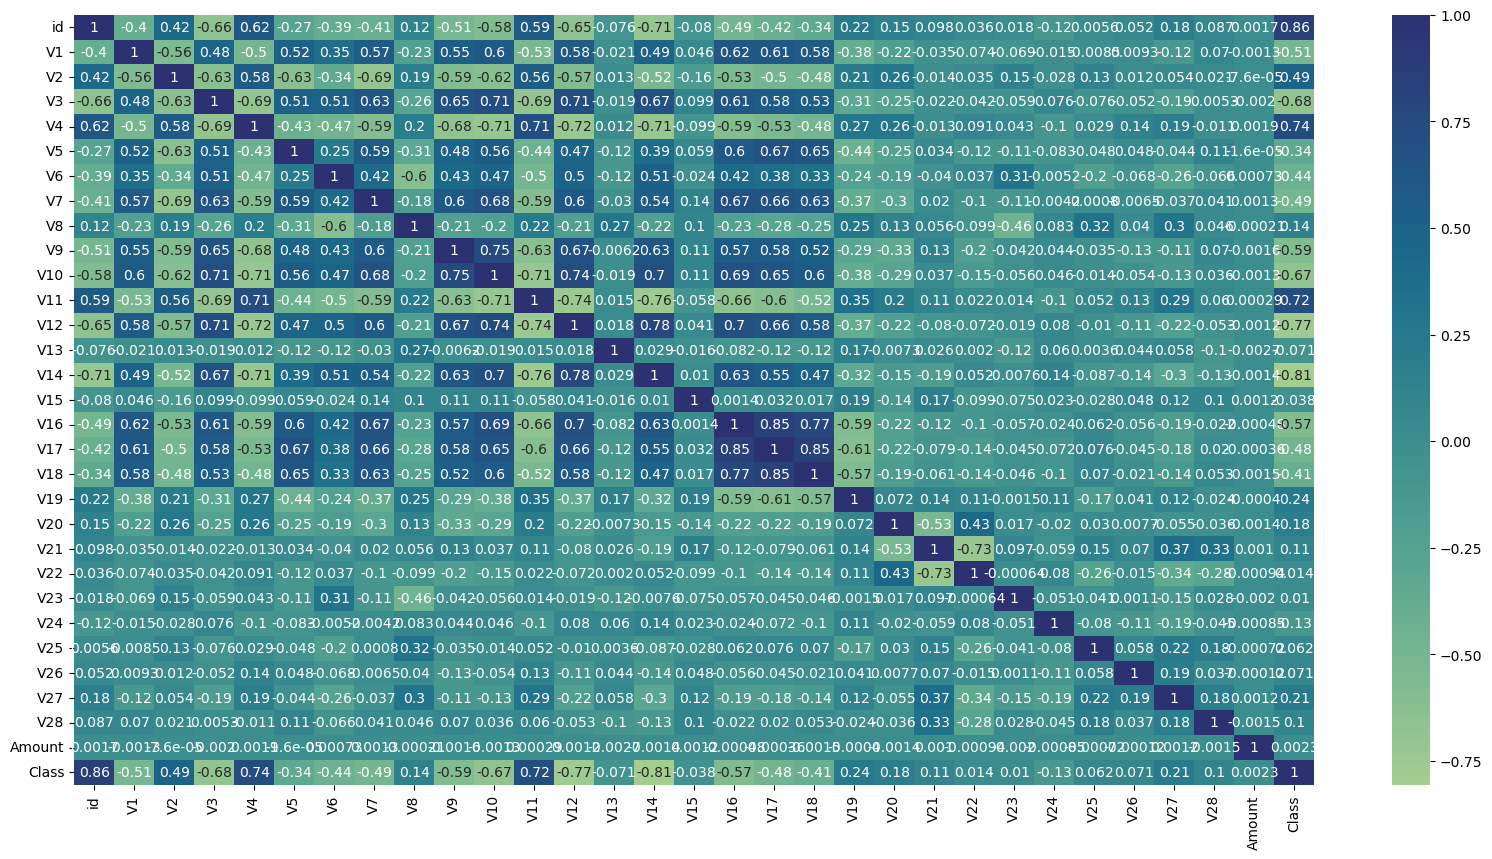

In [14]:
paper = plt.figure(figsize=[20,10])
sns.heatmap(data.corr(),cmap='crest',annot=True)
plt.show()

**Observations**
- Few features have high co-relation among different features.
- V17 and V18 are higly co-related.
- V16 and V17 are higly co-related.
- V14 has a negative corelation with V4.
- V12 is also negatively co-related with V10 and V11.
- V11 is ngetively co-related with V10 and positvely with V4.
- V3 is positevely co-related with V10 and V12.
- V9 and V10 are also positively co-related.

In [15]:
#Lets look the distribution using a pairplot

In [16]:
#sns.pairplot(data=data,hue='Class')

**Observations**
- Amount is almost normaly distributed.

In [17]:
#Lets skew the skewness of our features

In [18]:
data.skew() 

id       -6.579536e-16
V1       -8.341717e-02
V2       -1.397952e+00
V3        1.462221e-02
V4       -4.416893e-02
V5        1.506414e+00
V6       -2.016110e-01
V7        1.902687e+01
V8        2.999722e-01
V9        1.710575e-01
V10       7.404136e-01
V11      -2.089056e-02
V12       6.675895e-02
V13       1.490639e-02
V14       2.078348e-01
V15       1.123298e-02
V16       2.664070e-01
V17       3.730610e-01
V18       1.291911e-01
V19      -1.017123e-02
V20      -1.556460e+00
V21      -1.089833e-01
V22       3.185295e-01
V23      -9.968746e-02
V24       6.608974e-02
V25       2.300804e-02
V26      -1.895874e-02
V27       2.755452e+00
V28       1.724978e+00
Amount    1.655585e-03
Class     0.000000e+00
dtype: float64

**Observations**
- Features like V1,V10,V23 are highly negatively skewed. 
- We will see the distribution of some of these features.

In [19]:
#Lets See the distribution of 'amount feature'

<Axes: >

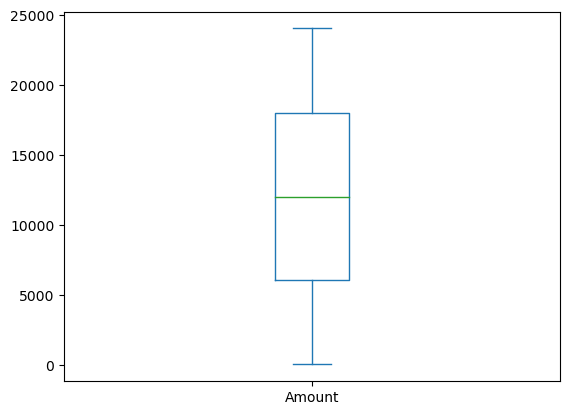

In [20]:
data['Amount'].plot.box()

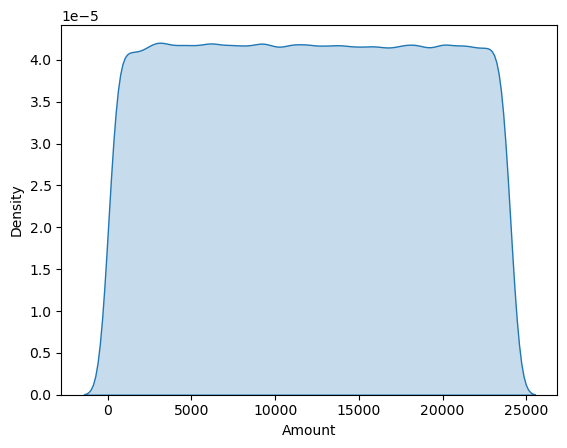

In [21]:
sns.kdeplot(data=data['Amount'], shade=True)
plt.show()

**Observations**:
- Amount is fairly Normally distributed.

In [22]:
#Lets look at at features V1,V10,V23 and V12

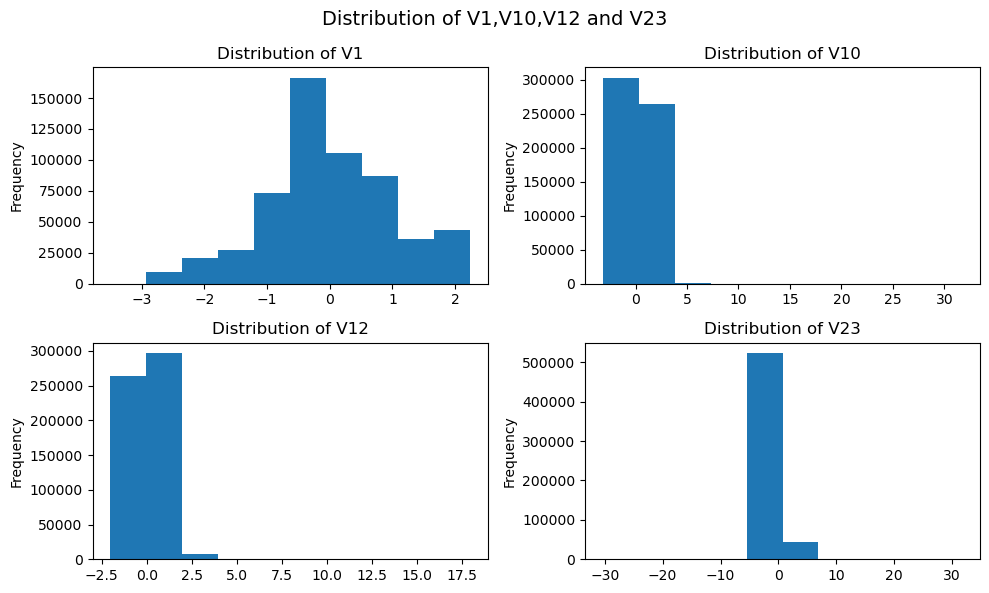

In [23]:
# Lets plot a histogram
paper, axes = plt.subplots(2, 2, figsize=(10, 6))
data['V1'].plot(kind='hist', ax=axes[0,0], title='Distribution of V1')
data['V10'].plot(kind='hist', ax=axes[0,1], title='Distribution of V10')
data['V12'].plot(kind='hist', ax=axes[1,0], title='Distribution of V12')
data['V23'].plot(kind='hist', ax=axes[1,1], title='Distribution of V23')
plt.suptitle('Distribution of V1,V10,V12 and V23',size=14)
plt.tight_layout()
plt.show()

In [24]:
#Lets look at our Output feature

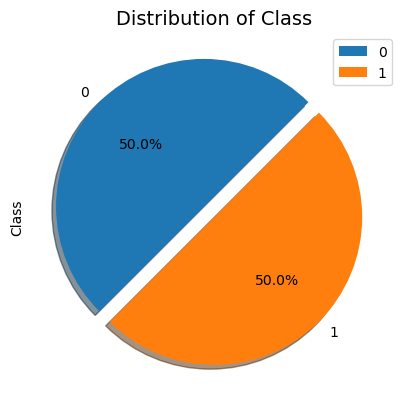

In [25]:
data['Class'].value_counts().plot.pie(explode=[0.1,0],autopct='%3.1f%%'
                                     ,shadow=True, legend= True,startangle =45)
plt.title('Distribution of Class',size=14)
plt.show()

**Observations**
- Our output feature is equally balanced.

## Data Preparation

In [26]:
# Lets prepare our data for our Model

In [27]:
data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [28]:
#Lets devide our data into dependent and independent features

In [29]:
x = data.drop(['id','Class'],axis=1)
y = data.Class

In [30]:
x.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97


In [31]:
print('Shape of x',x.shape)
print('Shape of y',y.shape)

Shape of x (568630, 29)
Shape of y (568630,)


In [32]:
#Lets standardize all our features to bring them on a same scale.
#I have used standard scaler

In [33]:
sc = StandardScaler()

In [34]:
x_scaled = sc.fit_transform(x) 

In [35]:
x_scaled_df = pd.DataFrame(x_scaled,columns=x.columns)

In [36]:
x_scaled_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,0.858447
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,-0.796369
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,-1.377011
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,-0.962119
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,0.323285


## Modelling

In [37]:
#Lets Split our dataset into train and test

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled_df,y,test_size=0.25,random_state=15,stratify= y)

In [39]:
#Lets see the shapes
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(426472, 29)
(142158, 29)
(426472,)
(142158,)


### Logistic Regression

In [40]:
#Lets build a Logistic Regression Model

In [41]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [42]:
#Lets define a function for Checking Model Accuracy,Classification Report and Confusion Matrix

In [43]:
def model_eval(actual, predicted):
  acc_score = accuracy_score(actual, predicted)
  conf_matrix = confusion_matrix(actual, predicted)
  clas_rep = classification_report(actual, predicted)
  print('Model Accuracy is: ', round(acc_score, 2))
  print(conf_matrix)
  print(clas_rep)

In [44]:
preds_lr_train = lr.predict(x_train)
preds_lr_test = lr.predict(x_test)

In [45]:
#Lets see the Evaluation matrix of train and test dataset

In [46]:
print('-------Training Accuracy---------')
model_eval(y_train,preds_lr_train)


-------Training Accuracy---------
Model Accuracy is:  0.97
[[208643   4593]
 [ 10330 202906]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97    213236
           1       0.98      0.95      0.96    213236

    accuracy                           0.97    426472
   macro avg       0.97      0.97      0.97    426472
weighted avg       0.97      0.97      0.97    426472



In [47]:
print('-------Test Accuracy---------')
model_eval(y_test, preds_lr_test)

-------Test Accuracy---------
Model Accuracy is:  0.96
[[69545  1534]
 [ 3520 67559]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     71079
           1       0.98      0.95      0.96     71079

    accuracy                           0.96    142158
   macro avg       0.96      0.96      0.96    142158
weighted avg       0.96      0.96      0.96    142158



**Observations**
- Our Logistic Regression Model is giving 96%Accuracy.
- Lets see tree-based models.

###  Decision Tree

In [48]:
#Lets build Decision tree Model and fit 

In [49]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [50]:
preds_dtree_train = dtree.predict(x_train)
preds_dtree_test = dtree.predict(x_test)

In [51]:
print('-------Training Accuracy---------')
model_eval(y_train,preds_dtree_train)

-------Training Accuracy---------
Model Accuracy is:  1.0
[[213236      0]
 [     0 213236]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    213236
           1       1.00      1.00      1.00    213236

    accuracy                           1.00    426472
   macro avg       1.00      1.00      1.00    426472
weighted avg       1.00      1.00      1.00    426472



In [52]:
print('-------Test Accuracy---------')
model_eval(y_test,preds_dtree_test)

-------Test Accuracy---------
Model Accuracy is:  1.0
[[70880   199]
 [   86 70993]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       1.00      1.00      1.00     71079

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158



### Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [55]:
preds_rf_train = rf.predict(x_train)
preds_rf_test = rf.predict(x_test)

In [56]:
print('-------Training Accuracy---------')
model_eval(y_train, preds_rf_train)

-------Training Accuracy---------
Model Accuracy is:  1.0
[[213236      0]
 [     0 213236]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    213236
           1       1.00      1.00      1.00    213236

    accuracy                           1.00    426472
   macro avg       1.00      1.00      1.00    426472
weighted avg       1.00      1.00      1.00    426472



In [57]:
print('-------Test Accuracy---------')
model_eval(y_test, preds_rf_test)

-------Test Accuracy---------
Model Accuracy is:  1.0
[[71062    17]
 [    0 71079]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       1.00      1.00      1.00     71079

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158



**Observations**:
- Random Forest with default parameters are giving 100% accuracy on both test and train dataset.

In [58]:
import xgboost as xgb

In [59]:
xgclf = xgb.XGBRFClassifier()
xgclf.fit(x_train,y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=None, reg_alpha=None, ...)

In [60]:
preds_xgb_train = xgclf.predict(x_train)
preds_xgb_test = xgclf.predict(x_test)

In [61]:
print('-------Training Accuracy---------')
model_eval(y_train,preds_xgb_train)

-------Training Accuracy---------
Model Accuracy is:  0.97
[[209470   3766]
 [  9686 203550]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97    213236
           1       0.98      0.95      0.97    213236

    accuracy                           0.97    426472
   macro avg       0.97      0.97      0.97    426472
weighted avg       0.97      0.97      0.97    426472



In [62]:
print('-------Test Accuracy---------')
model_eval(y_test,preds_xgb_test)

-------Test Accuracy---------
Model Accuracy is:  0.97
[[69837  1242]
 [ 3280 67799]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     71079
           1       0.98      0.95      0.97     71079

    accuracy                           0.97    142158
   macro avg       0.97      0.97      0.97    142158
weighted avg       0.97      0.97      0.97    142158



## Hypertuning

In [63]:
#We can also try and do some hyperparameter tuning to select the best parameters

In [64]:
from sklearn.model_selection import RandomizedSearchCV

In [65]:
#Heyerparamter tuning for XGBoost

In [66]:
param_dist_xgb = {
    'n_estimators': [50,100,150,200,300,400],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6]
}

In [67]:
xgb_clf = RandomizedSearchCV(xgclf,param_dist_xgb,verbose = 2)

In [68]:
xgb_clf.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   4.9s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   4.9s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   3.9s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   5.0s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   4.5s
[CV] END ...learning_rate=0.3, max_depth=4, n_estimators=150; total time=   5.7s
[CV] END ...learning_rate=0.3, max_depth=4, n_estimators=150; total time=   5.5s
[CV] END ...learning_rate=0.3, max_depth=4, n_estimators=150; total time=   5.4s
[CV] END ...learning_rate=0.3, max_depth=4, n_estimators=150; total time=   5.9s
[CV] END ...learning_rate=0.3, max_depth=4, n_estimators=150; total time=   5.5s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=300; total time=   9.6s
[CV] END ..learning_rate=0.01, max_depth=4, n_es

RandomizedSearchCV(estimator=XGBRFClassifier(base_score=None, booster=None,
                                             callbacks=None,
                                             colsample_bylevel=None,
                                             colsample_bytree=None, device=None,
                                             early_stopping_rounds=None,
                                             enable_categorical=False,
                                             eval_metric=None,
                                             feature_types=None, gamma=None,
                                             grow_policy=None,
                                             importance_type=None,
                                             interaction_constraints=None,
                                             max_bin=None,
                                             max_cat_threshold=None,
                                             ma...
                                             max_depth=None, max_leaves=None,
                                             min_child_weight=None, missing=nan,
                                             monotone_constraints=None,
                                             multi_strategy=None,
                                             n_estimators=None, n_jobs=None,
                                             num_parallel_tree=None,
                                             objective='binary:logistic',
                                             random_state=None, reg_alpha=None, ...),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 4, 5, 6],
                                        'n_estimators': [50, 100, 150, 200, 300,
                                                         400]},
                   verbose=2)

In [69]:
# If you want to save some time skip the above step. It took very long to run.
#You can check the best parameters and use directly with the above XG Boost model.

In [70]:
#Best Hyper paramters for XG Boost
print('Best Parameters for XG Boost :',xgb_clf.best_params_)

Best Parameters for XG Boost : {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1}


In [71]:
preds_xgb_clf_train = xgb_clf.predict(x_train)
preds_xgb_clf_test = xgb_clf.predict(x_test)

In [72]:
print('-------Training Accuracy---------')
model_eval(y_train,preds_xgb_clf_train)

-------Training Accuracy---------
Model Accuracy is:  0.96
[[209025   4211]
 [ 10995 202241]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96    213236
           1       0.98      0.95      0.96    213236

    accuracy                           0.96    426472
   macro avg       0.96      0.96      0.96    426472
weighted avg       0.96      0.96      0.96    426472



In [73]:
print('-------Test Accuracy---------')
model_eval(y_test,preds_xgb_clf_test)

-------Test Accuracy---------
Model Accuracy is:  0.96
[[69696  1383]
 [ 3693 67386]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     71079
           1       0.98      0.95      0.96     71079

    accuracy                           0.96    142158
   macro avg       0.96      0.96      0.96    142158
weighted avg       0.96      0.96      0.96    142158



In [77]:
import joblib  # Import joblib directly

# Save the trained model and scaler
joblib.dump(xgclf, 'xgboost_model.pkl')
joblib.dump(sc, 'scaler.pkl')

# Output the file names for confirmation
'model and scaler saved'

'model and scaler saved'

## Conclusion

- We have  done Exploratory Data analysis for different features.
- We prepared our Data and build different ML Models.
- We have seen how different models are performing w.r.t Accuracy,Precision,Recall and F1 Scores.
- Random Forest with default parameters is giving 100% accuracy on training and test dataset.
- We have tried using Boosting technique XGBoost and we have a model with 97% accuracy with improvement in **False Poitive and False Negative.**
- We have further tried doing hyper parameter tuning for XGBoost.We can with different parameters and see if further we can reduce the FP and FN.
